In [3]:
import pandas as pd

donwload the dataset and put under `data`

## Load user responses

In [4]:
data = pd.read_csv('data/train_data/train_task_3_4.csv')
print(max(data['QuestionId']))

947


In [5]:
print(list(data.groupby("QuestionId")))

[(0,          QuestionId  UserId  AnswerId  IsCorrect  CorrectAnswer  AnswerValue
572               0    4726    282545          1              1            1
746               0    2863   1319001          0              1            3
2895              0    4304     42788          0              1            2
2943              0     208    351023          0              1            4
4528              0    1189    853279          1              1            1
...             ...     ...       ...        ...            ...          ...
1379320           0    5758    713143          0              1            4
1379382           0    3678   1009128          0              1            3
1379699           0     166    918940          0              1            2
1380010           0    1289    705736          1              1            1
1380142           0    5861   1353112          0              1            2

[2812 rows x 6 columns]), (1,          QuestionId  UserId  AnswerId  I

In [6]:
# calc percent of correct for each question
for k,df in data.groupby('QuestionId'):
    print(k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem(), len((df['IsCorrect'])))

0 2812 0.44345661450924606 0.00937010933612387 2812
1 14 0.5714285714285714 0.13725270326150324 14
2 2313 0.3852140077821012 0.01012089927190456 2313
3 2672 0.8087574850299402 0.007609645680958906 2672
4 1704 0.4014084507042254 0.011878216105763999 1704
5 833 0.1908763505402161 0.013624539924512865 833
6 1718 0.5285215366705471 0.012046950521125473 1718
7 89 0.34831460674157305 0.050788279503341166 89
8 2327 0.3919209282337774 0.010122188032315155 2327
9 834 0.36330935251798563 0.016664029411268603 834
10 1572 0.4020356234096692 0.012370345562832941 1572
11 2171 0.45831414094887146 0.010696101386212332 2171
12 1701 0.3991769547325103 0.011877678361556275 1701
13 1259 0.6965845909451946 0.012961803326362887 1259
14 1697 0.6682380671773719 0.01143315150226891 1697
15 4 0.5 0.28867513459481287 4
16 2300 0.5834782608695652 0.010281623364912649 2300
17 848 0.42924528301886794 0.017007317337094287 848
18 2173 0.3175333640128854 0.00998861983102292 2173
19 2692 0.6355869242199108 0.0092774282

# be clear and unambiguous

I think clear and unambiguous question doesn't have variety of answer value. For example, if there is a question that count of student's answer value is 5,5,5,5 -> It's very unambiguous problem I think

So, I'll give score on entropy using H(x)=-∑P(xi​)logP(xi​)​
High entropy means High unambiguous

answervalue probablity
1. check P(1) ,P(2), P(3), P(4)
2. Use H(x)
3. make new list of ['Entropy'] group by qustionid
4. Plotting Entropy 

In [7]:
#Make H(x)
#H(x)=-∑P(xi​)logP(xi​)​
import numpy as np
def H(x):
    id_p = np.where(x != 0)
    return -np.sum(x[id_p]*np.log(x[id_p]))

In [171]:
real_entropy = []
#ent_sub_sem = []
for k,df in data.groupby('QuestionId'):
    freq = df["AnswerValue"].value_counts()
    #print(freq, sum(freq), len(df['AnswerValue']) , end = '')
    #1. Get P(1), P(2), P(3), P(4)
    #print(freq/ sum(freq)) -> P(1), P(2), P(3), P(4)
    #2. Get entropy 
    entropy = -sum([prob*np.log(prob) for prob in freq/sum(freq)]) 
    #ent_sub_sem = entropy/entropy.sem()
    real_entropy.append(entropy)
    #print(k, "Entropy: ", entropy)
    #3. make new list Entropy
    df["Entropy"] = entropy
    print(k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem(), len((df['IsCorrect'])), df['Entropy'].mean())

        

0 2812 0.44345661450924606 0.00937010933612387 2812 1.1944561192756886
1 14 0.5714285714285714 0.13725270326150324 14 0.8760057656431736
2 2313 0.3852140077821012 0.01012089927190456 2313 1.331663207561968
3 2672 0.8087574850299402 0.007609645680958906 2672 0.695422553399174
4 1704 0.4014084507042254 0.011878216105763999 1704 1.3243211426168566
5 833 0.1908763505402161 0.013624539924512865 833 1.1622062319419577
6 1718 0.5285215366705471 0.012046950521125473 1718 1.2084903053048708
7 89 0.34831460674157305 0.050788279503341166 89 1.3404960767116414
8 2327 0.3919209282337774 0.010122188032315155 2327 1.3089144701741107
9 834 0.36330935251798563 0.016664029411268603 834 1.2701398592379862
10 1572 0.4020356234096692 0.012370345562832941 1572 1.327351255180334
11 2171 0.45831414094887146 0.010696101386212332 2171 1.2750108870210033
12 1701 0.3991769547325103 0.011877678361556275 1701 1.2138634976524973
13 1259 0.6965845909451946 0.012961803326362887 1259 0.9167804629806292
14 1697 0.668238

[1.194456119275689, 0.8760057656431737, 1.3316632075619683, 0.6954225533991739, 1.3243211426168569, 1.1622062319419575, 1.2084903053048706, 1.3404960767116414, 1.3089144701741104, 1.270139859237986, 1.3273512551803335, 1.2750108870210033, 1.2138634976524971, 0.9167804629806295, 0.9821856587021622, 1.0397207708399179, 1.09043291571841, 1.3091720856211175, 1.357900573920328, 1.049648735111362, 0.9583061715974811, 1.3083837519625987, 0.9728192230998342, 1.2838580568279494, 1.0800747279419627, 0.6885025570777227, 1.174473541805139, 1.2795165223081921, 1.1148026162328304, 1.0352915371392668, 1.2262358309863937, 0.9607417068965622, 1.3248791615627689, 1.3862943611198906, 1.2103214342882118, 1.1820159592671018, 1.3070198783198173, 1.0943493455246185, 1.242500575712098, 1.2756493257833188, 1.3611114462639233, 1.2703756469536676, 1.3390654297229818, 0.8159869004823121, 1.3091029796183653, 1.2704160901924488, 1.275083705457424, 1.0916844702461859, 1.3255134780837037, 1.2794718426282587, 1.096564

Text(0, 0.5, 'Entropy')

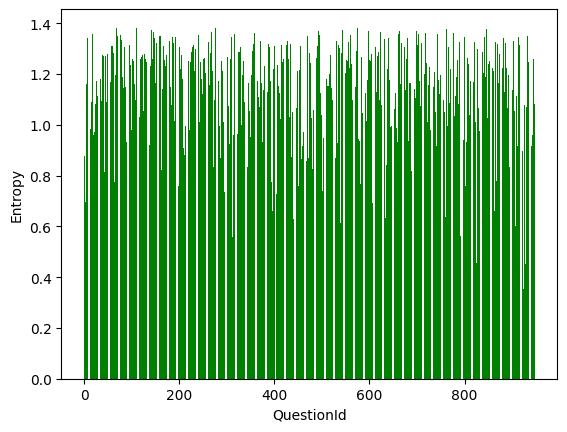

In [9]:
#plotting entropy group by questionId
import matplotlib.pyplot as plt
print(real_entropy)
print(len(real_entropy))
for i in range(len(real_entropy)):
    plt.bar(i,real_entropy[i],color = 'green')
#plt.bar(real_entropy)
plt.xlabel('QuestionId')
plt.ylabel('Entropy')

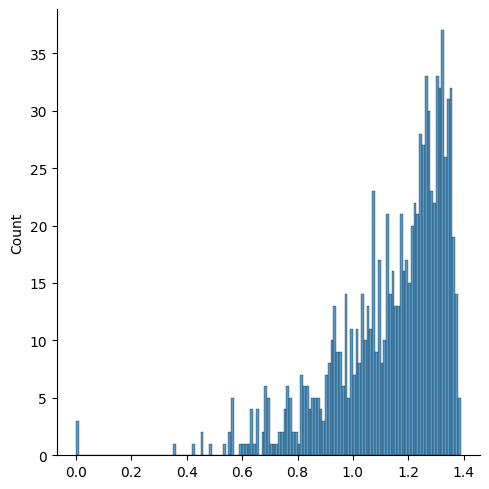

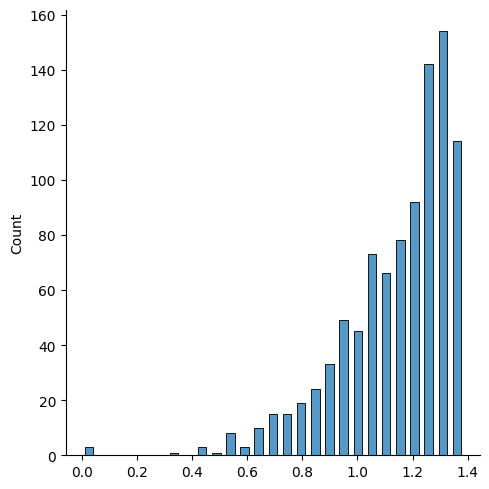

In [10]:
import seaborn as sns
sns.displot(real_entropy, binwidth=0.01)
sns.displot(real_entropy,shrink=.6)

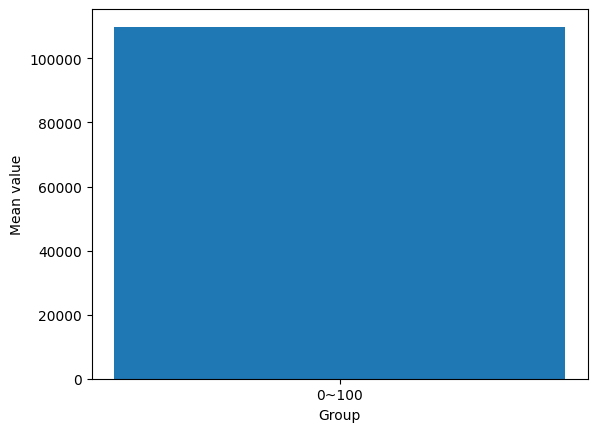

In [11]:

# [0]~[100] 그룹과 [100]~[900] 그룹으로 분할
group1 = data[:101]

# 각 그룹의 평균값 계산
mean1 = np.mean(group1)

# 결과 시각화
plt.bar(['0~100'], [mean1])
plt.xlabel('Group')
plt.ylabel('Mean value')
plt.show()


# single concept

I think if quesiton can solved by using single concept or skill then correctenss of question will high
so I set second parameter correctness by using ['IsCorrect] group by ['QuestionId]




In [12]:
real_correctness = []
data = pd.read_csv('data/train_data/train_task_3_4.csv')
for k,df in data.groupby('QuestionId'):

    correctness = df['IsCorrect'].mean()
    real_correctness.append(correctness)
    #print(k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem(), len((df['IsCorrect'])), df['Entropy'].mean())

print(real_correctness)
        

[0.44345661450924606, 0.5714285714285714, 0.3852140077821012, 0.8087574850299402, 0.4014084507042254, 0.1908763505402161, 0.5285215366705471, 0.34831460674157305, 0.3919209282337774, 0.36330935251798563, 0.4020356234096692, 0.45831414094887146, 0.3991769547325103, 0.6965845909451946, 0.6682380671773719, 0.5, 0.5834782608695652, 0.42924528301886794, 0.3175333640128854, 0.6355869242199108, 0.6338605741066198, 0.40875912408759124, 0.618519842688595, 0.44905008635578586, 0.6194061062317022, 0.8116182572614108, 0.5282392026578073, 0.45169600686990125, 0.4888888888888889, 0.6161849710982659, 0.507643085673658, 0.6719858156028369, 0.38571428571428573, 0.25, 0.49099485420240135, 0.5161290322580645, 0.407496977025393, 0.6055408970976254, 0.4959709911361805, 0.45607978519370923, 0.3501346671796845, 0.3343949044585987, 0.3614457831325301, 0.75, 0.3259566620562471, 0.4266263237518911, 0.2638997650743931, 0.59500693481276, 0.381903642773208, 0.45301112389719983, 0.5885792913656691, 0.52907311456534

# Use bar graph group by QuestionId

[]


Text(0, 0.5, 'Correctness')

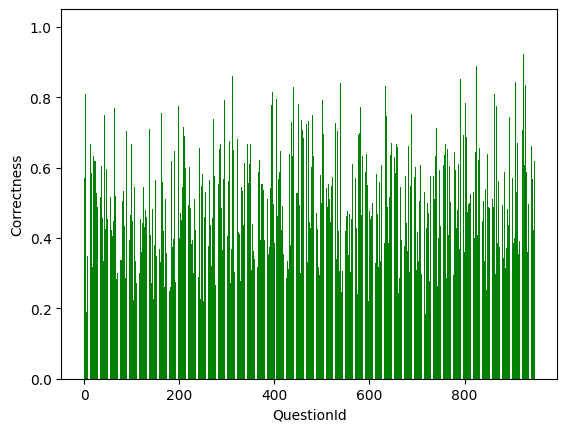

In [170]:
#plotting entropy group by questionId
import matplotlib.pyplot as plt
for i in range(len(real_correctness)):
    plt.bar(i,real_correctness[i],color = 'green')
#plt.bar(real_entropy)
plt.xlabel('QuestionId')
plt.ylabel('Correctness')

# Use displot

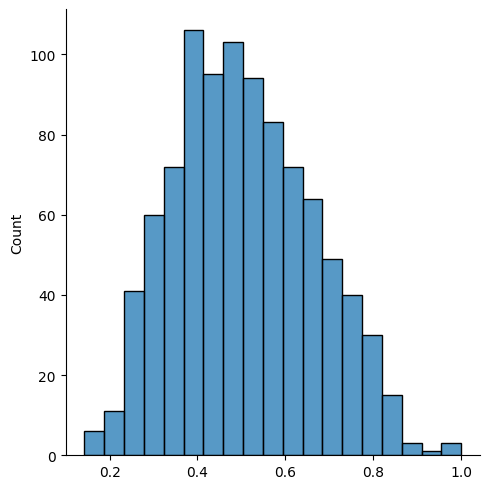

In [14]:
sns.displot(real_correctness)

# Use boxplot

<Axes: >

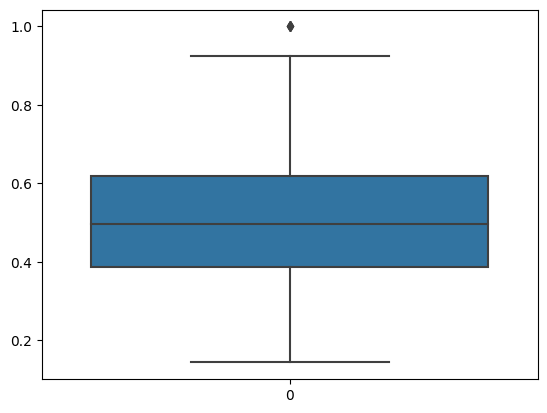

In [15]:
sns.boxplot(real_correctness)

# 3. Students should be able to answer them in less than 10 seconds


I think answer the question less than 10 seconds is very hard to solve hard question, 
even if normal questions are also hard. Only very very easy question can solved in less than 10 seconds.
At a result, if, first rule and second rule both satisfied than It can said that 'easy and unambiguous question'
So, I'll use two parameters(real_entropy, real_correctness)  
and I make new parameter(true_easy) == 0.5*true_entropy + 0.9*true_correctness
*Caution*
range of real_entropy and real_correctness are different
SO, need normalization to use both data
I'll use z-normalization

In [16]:
# from sklearn.preprocessing import MinMaxScaler

# # Entropy 값의 범위를 -3부터 3까지로 변경
# entropy_min = min(real_entropy)
# entropy_max = max(real_entropy)
# real_entropy_normalized = [(x - entropy_min) / (entropy_max - entropy_min) * 6 - 3 for x in real_entropy]

# # Correctness 값의 범위를 -3부터 3까지로 변경
# correctness_min = min(real_correctness)
# correctness_max = max(real_correctness)
# correctness_normalized = [(x - correctness_min) / (correctness_max - correctness_min) * 6 - 3 for x in real_correctness]

# # Standardization을 이용하여 z-score 정규화
# scaler = StandardScaler()
# real_entropy_normalized = scaler.fit_transform(np.array(real_entropy_normalized).reshape(-1,1)).flatten()
# correctness_normalized = scaler.fit_transform(np.array(correctness_normalized).reshape(-1,1)).flatten()

# sns.displot(real_entropy_normalized)
# print("max - min : ", max(real_entropy_normalized) - min(real_entropy_normalized))
# sns.displot(correctness_normalized)
# print("max - min : ", max(correctness_normalized) - min(correctness_normalized))
# scaler = MinMaxScaler()
# a = np.array(real_entropy)
# a.reshape(1,-1)
# scaler.fit_transform(a)

In [17]:
# #sklearn.normalization
# from sklearn import preprocessing
# import numpy as np
# entropy_normalization = np.array(real_entropy)
# correctness_normalization = np.array(real_correctness)
# correctness_normalization= preprocessing.normalize([correctness_normalization])
# print(real_correctness)
# print(correctness_normalization)

# print(real_entropy)
# print(entropy_normalization)


[0.44345661450924606, 0.5714285714285714, 0.3852140077821012, 0.8087574850299402, 0.4014084507042254, 0.1908763505402161, 0.5285215366705471, 0.34831460674157305, 0.3919209282337774, 0.36330935251798563, 0.4020356234096692, 0.45831414094887146, 0.3991769547325103, 0.6965845909451946, 0.6682380671773719, 0.5, 0.5834782608695652, 0.42924528301886794, 0.3175333640128854, 0.6355869242199108, 0.6338605741066198, 0.40875912408759124, 0.618519842688595, 0.44905008635578586, 0.6194061062317022, 0.8116182572614108, 0.5282392026578073, 0.45169600686990125, 0.4888888888888889, 0.6161849710982659, 0.507643085673658, 0.6719858156028369, 0.38571428571428573, 0.25, 0.49099485420240135, 0.5161290322580645, 0.407496977025393, 0.6055408970976254, 0.4959709911361805, 0.45607978519370923, 0.3501346671796845, 0.3343949044585987, 0.3614457831325301, 0.75, 0.3259566620562471, 0.4266263237518911, 0.2638997650743931, 0.59500693481276, 0.381903642773208, 0.45301112389719983, 0.5885792913656691, 0.52907311456534

In [18]:
# #z-score normalization
# from scipy.stats import zscore
# correctness_zscores = zscore(real_correctness) # z-score normalization
# entropy_zscores = zscore(real_entropy)
# print(min(real_correctness), max(real_correctness))

# print(min(real_entropy), max(real_entropy))
# print(min(correctness_zscores), max(correctness_zscores))
# print(min(entropy_zscores), max(entropy_zscores))


0.14285714285714285 1.0
-0.0 1.3862943611198906
-2.3248611231365137 3.1468973231796515
-5.586156469890266 1.2110767894116914


In [189]:
# Max-Min Scaler -> Use this normalization
from sklearn.preprocessing import MinMaxScaler

print(real_correctness)

#print(real_entropy)
scaler = MinMaxScaler()
a = np.array(real_correctness).reshape(-1,1)
correctness_norm = scaler.fit_transform(a)
b = np.array(real_entropy).reshape(-1,1)
entropy_norm = scaler.fit_transform(b)
print(correctness_norm.reshape(1,-1))

[0.44345661450924606, 0.5714285714285714, 0.3852140077821012, 0.8087574850299402, 0.4014084507042254, 0.1908763505402161, 0.5285215366705471, 0.34831460674157305, 0.3919209282337774, 0.36330935251798563, 0.4020356234096692, 0.45831414094887146, 0.3991769547325103, 0.6965845909451946, 0.6682380671773719, 0.5, 0.5834782608695652, 0.42924528301886794, 0.3175333640128854, 0.6355869242199108, 0.6338605741066198, 0.40875912408759124, 0.618519842688595, 0.44905008635578586, 0.6194061062317022, 0.8116182572614108, 0.5282392026578073, 0.45169600686990125, 0.4888888888888889, 0.6161849710982659, 0.507643085673658, 0.6719858156028369, 0.38571428571428573, 0.25, 0.49099485420240135, 0.5161290322580645, 0.407496977025393, 0.6055408970976254, 0.4959709911361805, 0.45607978519370923, 0.3501346671796845, 0.3343949044585987, 0.3614457831325301, 0.75, 0.3259566620562471, 0.4266263237518911, 0.2638997650743931, 0.59500693481276, 0.381903642773208, 0.45301112389719983, 0.5885792913656691, 0.52907311456534

# Check Max-Min normalization using plotting

[]


Text(0, 0.5, 'Entropy')

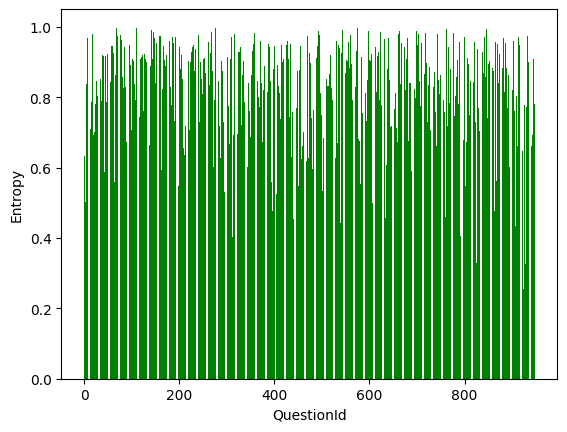

In [164]:
#plotting entropy_norm group by questionId
import matplotlib.pyplot as plt
for i in range(len(real_correctness)):
    plt.bar(i,entropy_norm[i],color = 'green')
#plt.bar(real_entropy)
plt.xlabel('QuestionId')
plt.ylabel('Entropy')

Text(0, 0.5, 'Correctness')

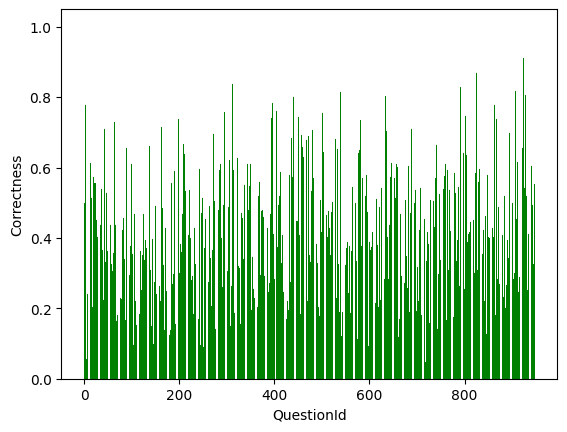

In [187]:
#plotting entropy_norm group by questionId
import matplotlib.pyplot as plt
for i in range(len(real_correctness)):
    plt.bar(i,correctness_norm[i],color = 'green')
#plt.bar(real_entropy)
plt.xlabel('QuestionId')
plt.ylabel('Correctness')

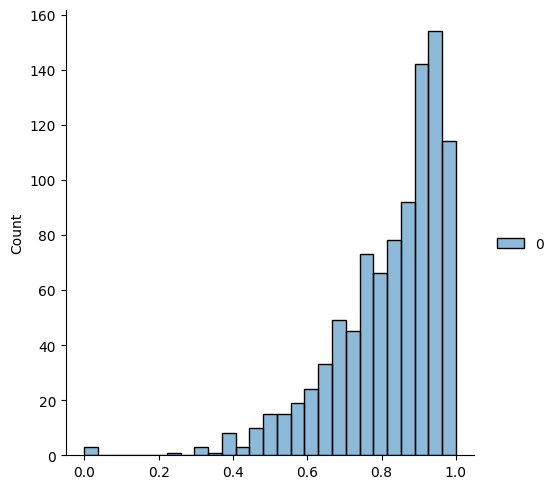

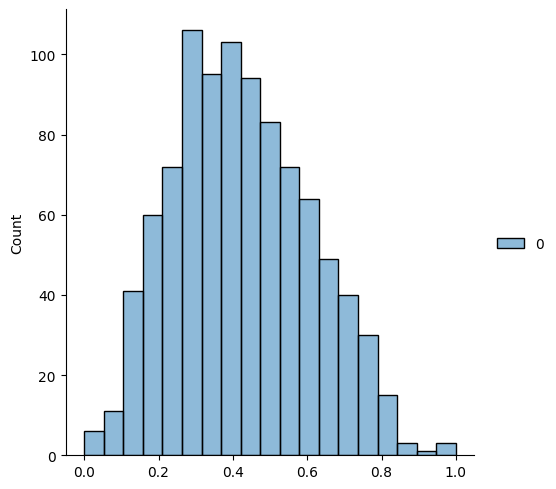

In [21]:
sns.displot(entropy_norm)
sns.displot(correctness_norm)

# getting score

Using Max-Min Scaler

1. entropy : lower is better
2. correctness : higher is better
3.  result_score : a * correctness + b * (-entropy) + c * (c1 * correctness + c2 * (-entropy))  다항식의 평가 지표를 수정하기
(엔트로피를 평가 지표에 넣을 때,  e^-x, 1/x, -, )



# set_weight -> rank_data -> write_submission -> check_accuracy ->(evaluate_test_data/evaluate_valid_data)

In [273]:
# load evaluators' score on "test" set
def evaluate_test_data():
    eval_validation = pd.read_csv('data/test_data/quality_response_remapped_private.csv')
    # take the average of 5 evaulators` scores
    eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
    preference = np.ones(len(eval_validation['score']), dtype=int)
    idx_two = eval_validation['score'] > 1.5
    preference[idx_two] = 2 
    return preference

In [274]:
# load evaluators' score on "validation" set
def train_valid_data():
    eval_validation = pd.read_csv('data/test_data/quality_response_remapped_public.csv')
    # take the average of 5 evaulators` scores
    eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
    preference = np.ones(len(eval_validation['score']), dtype=int)
    idx_two = eval_validation['score'] > 1.5
    preference[idx_two] = 2 
    return preference

In [275]:
#set rank data
def rank_data_test(data):
    sorted_data = sorted(enumerate(data), key=lambda x: x[1], reverse=True)
    sorted_index, sorted_values = zip(*sorted_data)
    sort_rank = [0] * len(sorted_index)  # 0으로 채워진 리스트 생성
    for i, qid in enumerate(sorted_index):
        rank = i + 1  # 랭킹 계산
        sort_rank[qid] = rank  # 문제번호와 매칭된 인덱스에 랭킹을 적어
    return write_submission_test(sort_rank); # write_submission

In [276]:
#set rank data
def rank_data(data):
    sorted_data = sorted(enumerate(data), key=lambda x: x[1], reverse=True)
    sorted_index, sorted_values = zip(*sorted_data)
    sort_rank = [0] * len(sorted_index)  # 0으로 채워진 리스트 생성
    for i, qid in enumerate(sorted_index):
        rank = i + 1  # 랭킹 계산
        sort_rank[qid] = rank  # 문제번호와 매칭된 인덱스에 랭킹을 적어
    return write_submission(sort_rank)# write_submission

In [277]:
#set weight
def set_weight_test(a,b,c,c1,c2):
    answer_rank = []
    for i in range(len(real_correctness)):
        answer = a * correctness_norm[i] + b * (-entropy_norm[i]) + c*(c1 * correctness_norm[i] + c2 * (-entropy_norm[i]))
        answer_rank.append(answer)
    return rank_data_test(answer_rank)



In [278]:
#set weight
def set_weight(a,b,c,c1,c2):
    answer_rank = []
    for i in range(len(real_correctness)):
        answer = a * correctness_norm[i] + b * (-entropy_norm[i]) + c*(c1 * correctness_norm[i] + c2 * (-entropy_norm[i]))
        answer_rank.append(answer)
    return rank_data(answer_rank)



In [279]:
#write submission_file
import os
def write_submission_test(data):
    submission_df = pd.read_csv("../submission/template.csv")
    submission_df['ranking'] = data
    submission_df.to_csv("../submission/answer_ranking", index=False)
    eval_validation = pd.read_csv('data/test_data/quality_response_remapped_private.csv')
    return test_accuracy(eval_validation, submission_df)
    #print("submisson_df", submission_df)


In [280]:
#write submission_file
import os
def write_submission(data):
    submission_df = pd.read_csv("../submission/template.csv")
    submission_df['ranking'] = data
    submission_df.to_csv("../submission/answer_ranking", index=False)
    eval_validation = pd.read_csv('data/test_data/quality_response_remapped_public.csv')
    return check_accuracy(eval_validation, submission_df)
    #print("submisson_df", submission_df)


In [281]:
#check_accuracy
def test_accuracy(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        #print('left questionid : ',left[idx], 'left_rank : ', ranking_left, 'right question : ' , right[idx], 'right_rank : ', ranking_right)
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    check_data = evaluate_test_data()
    accuracy = [0] * len(submission_preference)
    for i in range(len(submission_preference)):
        accuracy[i] = 1 if submission_preference[i] == check_data[i] else 0
    print("\n\nAccuracy : ", np.array(accuracy).mean())
    

In [282]:
#check_accuracy
def check_accuracy(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        #print('left questionid : ',left[idx], 'left_rank : ', ranking_left, 'right question : ' , right[idx], 'right_rank : ', ranking_right)
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    check_data = train_valid_data()
    accuracy = [0] * len(submission_preference)
    for i in range(len(submission_preference)):
        accuracy[i] = 1 if submission_preference[i] == check_data[i] else 0
    #print("valid_Accuracy : ", np.array(accuracy).mean())
    return np.array(accuracy).mean()
    

# Grid_Search to find hipher parameter(a,b,c,c1,c2) to use valid data to train

# test1 score :  a * correctness + b * (-entropy) + c * (c1 * correctness + c2 * (-entropy)) 



In [283]:
#set weight
def set_weight(a,b,c,c1,c2):
    answer_rank = []
    for i in range(len(real_correctness)):
        answer = a * correctness_norm[i] + b * (-entropy_norm[i]) + c*(c1 * correctness_norm[i] + c2 * (-entropy_norm[i]))
        answer_rank.append(answer)
    return rank_data(answer_rank)



In [284]:
#set weight
def set_weight_test(a,b,c,c1,c2):
    answer_rank = []
    for i in range(len(real_correctness)):
        answer = a * correctness_norm[i] + b * (-entropy_norm[i]) + c*(c1 * correctness_norm[i] + c2 * (-entropy_norm[i]))
        answer_rank.append(answer)
    return rank_data_test(answer_rank)



Best params:  (0.0, 0.0, 1.0, 0.8)
Best_Accuracy:  0.24


Accuracy :  0.32


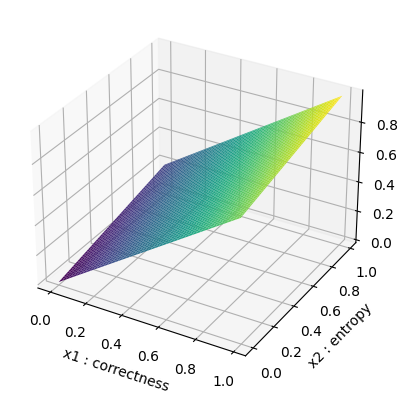

In [285]:
import numpy as np
from sklearn.metrics import mean_squared_error

# 함수 정의

# 파라미터 값들의 후보군 리스트 생성
a_candidates = np.linspace(0, 1, 11)
b_candidates = np.linspace(0, 1, 11)
c_candidates = np.linspace(0, 1, 11)
c1_candidates = np.linspace(0, 1, 11)

# 최적 파라미터 초기화
best_params = None
best_mse = 0

# 그리드 서치로 최적 파라미터 찾기
for a in a_candidates:
    for b in b_candidates:
        for c in c_candidates:
            for c1 in c1_candidates:
                # 제약 조건(제약 조건이 만족되지 않을 경우 건너뜀)
                if a + b + c != 1 or c1 + (1-c1) != 1:
                    continue
                # 모델 적합
                y_pred = set_weight(a, b, c, c1, 1-c1)
                # 최적 파라미터 업데이트
                if y_pred > best_mse:
                    best_params = (a, b, c, c1)
                    best_mse = y_pred

print("Best params: ", best_params)
print("Best_Accuracy: ", best_mse)
a,b,c1,c2 = best_params
y_test = set_weight_test(a,b,c1,c2,1-c2)


from mpl_toolkits.mplot3d import Axes3D

# Constants
a,b,c1,c2 = best_params
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
x1, x2 = np.meshgrid(x1, x2)
y = a * x1 + b * x2 + c1 * (c2 * x1 + (1 - c2) * x2)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y, cmap='viridis')
ax.set_xlabel('x1 : correctness')
ax.set_ylabel('x2 : entropy')
ax.set_zlabel('y')
plt.show()


# test2 score : a * correctness + b * (e^-entropy) + c *  (c1 * correctness + c2 * (e^-entropy))

In [286]:
import math
#Change equation in set_weight
def set_weight(a,b,c,c1,c2):
    answer_rank = []
    for i in range(len(real_correctness)):
        answer = a * correctness_norm[i] + b * math.exp(-entropy_norm[i]) + c*(c1 * correctness_norm[i] + c2 *  math.exp(-entropy_norm[i]))
        answer_rank.append(answer)
    return rank_data(answer_rank)


In [289]:
import math
#Change equation in set_weight
def set_weight_test(a,b,c,c1,c2):
    answer_rank = []
    for i in range(len(real_correctness)):
        answer = a * correctness_norm[i] + b * np.exp(-entropy_norm[i]) + c*(c1 * correctness_norm[i] + c2 *  np.exp(-entropy_norm[i]))
        answer_rank.append(answer)
    return rank_data_test(answer_rank)


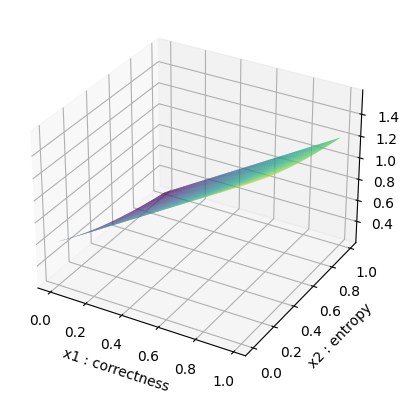

Best params:  (0.0, 0.0, 1.0, 0.6000000000000001)
Best_Accuracy:  0.24


Accuracy :  0.32


In [290]:
import numpy as np
from sklearn.metrics import mean_squared_error

# 함수 정의

# 파라미터 값들의 후보군 리스트 생성
a_candidates = np.linspace(0, 1, 11)
b_candidates = np.linspace(0, 1, 11)
c_candidates = np.linspace(0, 1, 11)
c1_candidates = np.linspace(0, 1, 11)

# 최적 파라미터 초기화
best_params = None
best_mse = 0

# 그리드 서치로 최적 파라미터 찾기
for a in a_candidates:
    for b in b_candidates:
        for c in c_candidates:
            for c1 in c1_candidates:
                # 제약 조건(제약 조건이 만족되지 않을 경우 건너뜀)
                if a + b + c != 1 or c1 + (1-c1) != 1:
                    continue
                # 모델 적합
                y_pred = set_weight(a, b, c, c1, 1-c1)
                # 최적 파라미터 업데이트
                if y_pred > best_mse:
                    best_params = (a, b, c, c1)
                    best_mse = y_pred




from mpl_toolkits.mplot3d import Axes3D

# Constants
a,b,c1,c2 = best_params
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
x1, x2 = np.meshgrid(x1, x2)
y = a * x1 + b * np.exp(-x2) + c*(c1 * x1 + c2 *  np.exp(-x2))

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y, cmap='viridis')
ax.set_xlabel('x1 : correctness')
ax.set_ylabel('x2 : entropy')
ax.set_zlabel('y')
plt.show()
print("Best params: ", best_params)
print("Best_Accuracy: ", best_mse)
y_test = set_weight_test(a,b,c1,c2,1-c2)

In [297]:
import math
#Change equation in set_weight
def set_weight(a,b,c,c1,c2):
    answer_rank = []
    for i in range(len(real_correctness)):
        answer = a * correctness_norm[i] + b *(1 / (entropy_norm[i]+0.0001)) + c*(c1 * real_correctness[i] + c2 * (1 / (entropy_norm[i]+0.0001)))
        answer_rank.append(answer)
    return rank_data(answer_rank)


In [298]:
import math
#Change equation in set_weight
def set_weight_test(a,b,c,c1,c2):
    answer_rank = []
    for i in range(len(real_correctness)):
        answer = a * correctness_norm[i] + b *(1 / (entropy_norm[i]+0.0001))+ c*(c1 * real_correctness[i] + c2 * (1 / (entropy_norm[i]+0.0001)))
        answer_rank.append(answer)
    return rank_data_test(answer_rank)


C:\Users\USER\AppData\Local\Temp\ipykernel_24132\252603762.py:35: RuntimeWarning: divide by zero encountered in divide
  y = a * x1 + b *(1/x2) + c*(c1 * x1 + c2 * (1/x2))
C:\Users\USER\AppData\Local\Temp\ipykernel_24132\252603762.py:35: RuntimeWarning: invalid value encountered in multiply
  y = a * x1 + b *(1/x2) + c*(c1 * x1 + c2 * (1/x2))


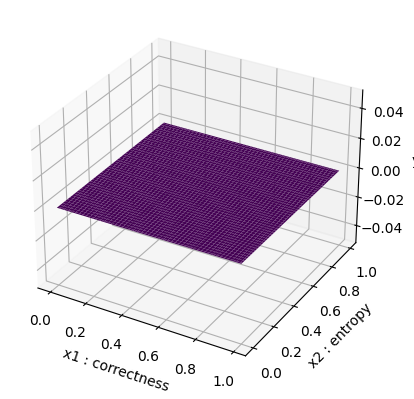

Best params:  (0.0, 0.0, 0.0, 0.0)
Best_Accuracy:  0.48


Accuracy :  0.44


In [300]:
import numpy as np
from sklearn.metrics import mean_squared_error

# 함수 정의

# 파라미터 값들의 후보군 리스트 생성
a_candidates = np.linspace(0, 1, 11)
b_candidates = np.linspace(0, 1, 11)
c_candidates = np.linspace(0, 1, 11)
c1_candidates = np.linspace(0, 1, 11)

# 최적 파라미터 초기화
best_params = None
best_mse = 0

# 그리드 서치로 최적 파라미터 찾기
for a in a_candidates:
    for b in b_candidates:
        for c in c_candidates:
            for c1 in c1_candidates:
                # 제약 조건(제약 조건이 만족되지 않을 경우 건너뜀)
                if a + b + c != 1 or c1 + (1-c1) != 1:
                    continue
                # 모델 적합
                y_pred = set_weight(a, b, c, c1, 1-c1)
                # 최적 파라미터 업데이트
                if y_pred > best_mse:
                    best_params = (a, b, c, c1)
                    best_mse = y_pred


# Constants
a,b,c1,c2 = best_params
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
x1, x2 = np.meshgrid(x1, x2)
y = a * x1 + b *(1/x2) + c*(c1 * x1 + c2 * (1/x2))

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y, cmap='viridis')
ax.set_xlabel('x1 : correctness')
ax.set_ylabel('x2 : entropy')
ax.set_zlabel('y')
plt.show()
print("Best params: ", best_params)
print("Best_Accuracy: ", best_mse)
y_test = set_weight_test(a,b,c1,c2,1-c2)